<a href="https://colab.research.google.com/github/shubh70abhir/project1/blob/main/time_series_sma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Fetch historical stock price data for Apple Inc. (AAPL) using yfinance library
stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098679,181.669251,179.094712,180.903857,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
2024-01-09,184.035065,184.045000,181.639444,182.822345,42841800
2024-01-10,185.078812,185.287550,182.822355,183.249796,46792900
2024-01-11,184.482361,185.933654,182.524117,185.426688,49128400


[*********************100%***********************]  1 of 1 completed


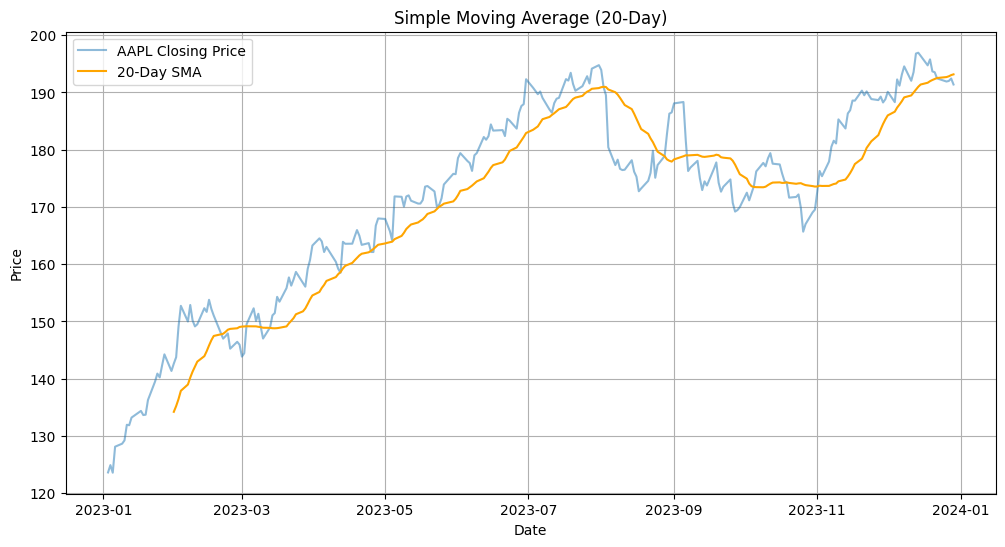

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical data
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Calculate 20-day SMA
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()

# Plot closing prices with SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='AAPL Closing Price', alpha=0.5)
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Simple Moving Average (20-Day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

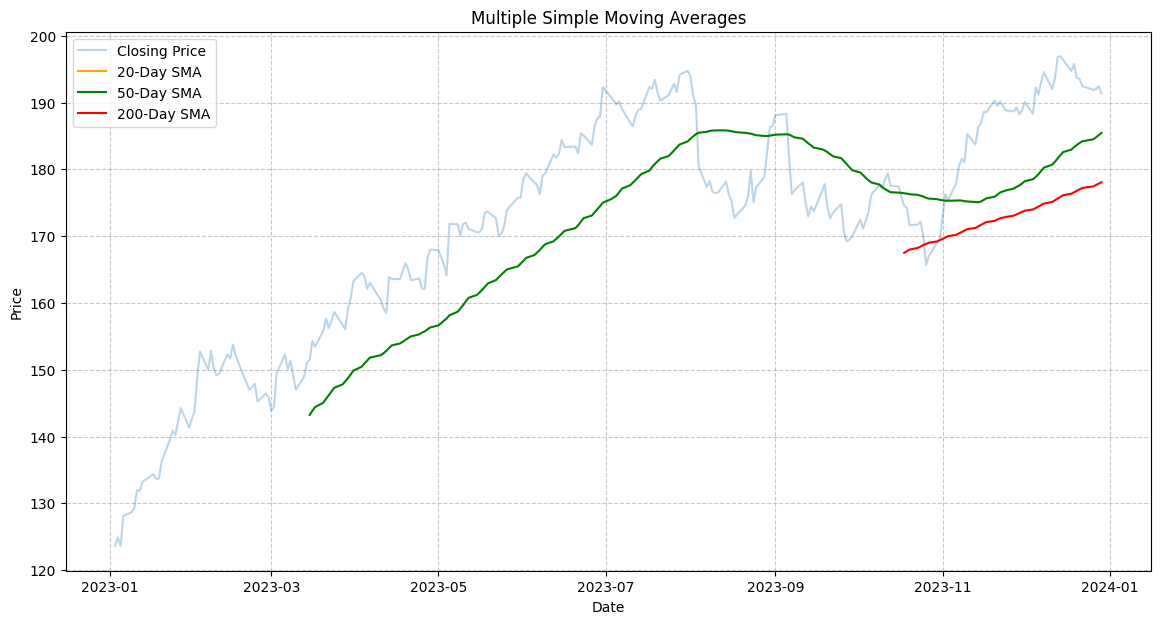

In [ ]:
# Calculate multiple SMAs
windows = [20, 50, 200]  # Common trading periods
for w in windows:
    stock_data[f'SMA_{w}'] = stock_data['Close'].rolling(window=w).mean()

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Closing Price', alpha=0.3)
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(stock_data['SMA_200'], label='200-Day SMA', color='red')

plt.title('Multiple Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

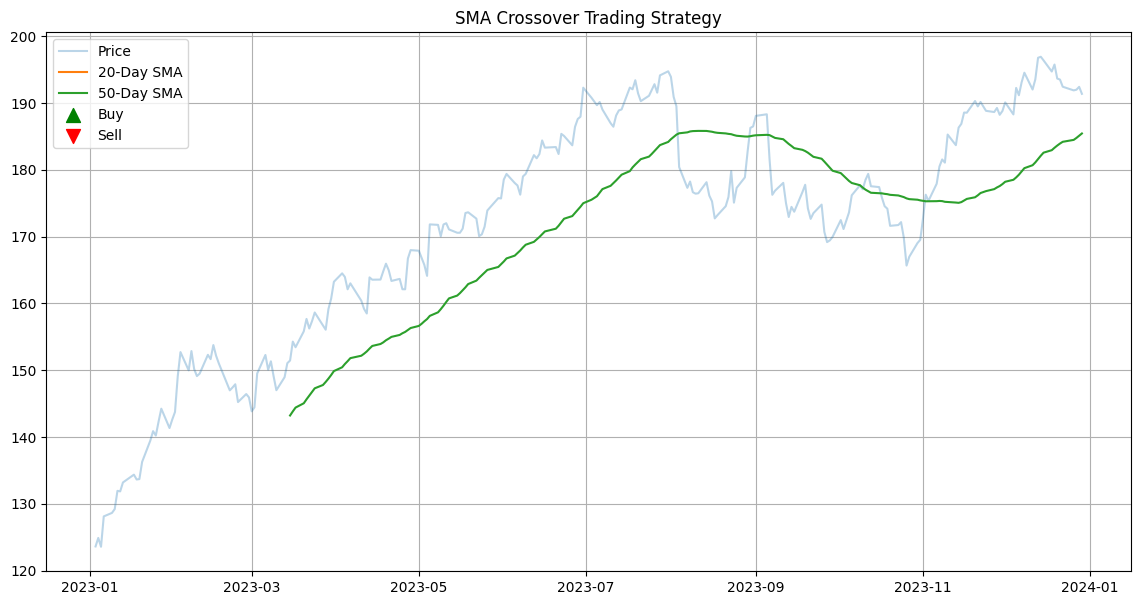

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import the numpy library and assign it to the alias 'np'

# Generate crossover signals
stock_data['Signal'] = 0
stock_data['Signal'][20:] = np.where(
    stock_data['SMA_20'][20:] > stock_data['SMA_50'][20:], 1, -1
)

# Plot with signals
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['SMA_20'], label='20-Day SMA')
plt.plot(stock_data['SMA_50'], label='50-Day SMA')

# Plot buy/sell signals
plt.scatter(stock_data.index[stock_data['Signal'] == 1],
           stock_data['SMA_20'][stock_data['Signal'] == 1],
           marker='^', color='g', s=100, label='Buy')
plt.scatter(stock_data.index[stock_data['Signal'] == -1],
           stock_data['SMA_20'][stock_data['Signal'] == -1],
           marker='v', color='r', s=100, label='Sell')

plt.title('SMA Crossover Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def calculate_sma(ticker, start_date, windows):
    """Calculate multiple SMAs for any stock"""
    data = yf.download(ticker, start=start_date)
    for w in windows:
        data[f'SMA_{w}'] = data['Close'].rolling(window=w).mean()
    return data.dropna()

# Usage
sma_data = calculate_sma('GOOGL', '2020-01-01', [20, 50, 200])
print(sma_data[['Close', 'SMA_20', 'SMA_50', 'SMA_200']].tail())

[*********************100%***********************]  1 of 1 completed

Price            Close      SMA_20      SMA_50     SMA_200
Ticker           GOOGL                                    
Date                                                      
2025-04-11  157.139999  158.035001  170.879811  173.338394
2025-04-14  159.070007  157.774001  169.985505  173.217668
2025-04-15  156.309998  157.556001  169.091735  173.075521
2025-04-16  153.330002  157.028001  168.035483  172.934714
2025-04-17  151.160004  156.446001  167.236485  172.778872


[*********************100%***********************]  1 of 1 completed


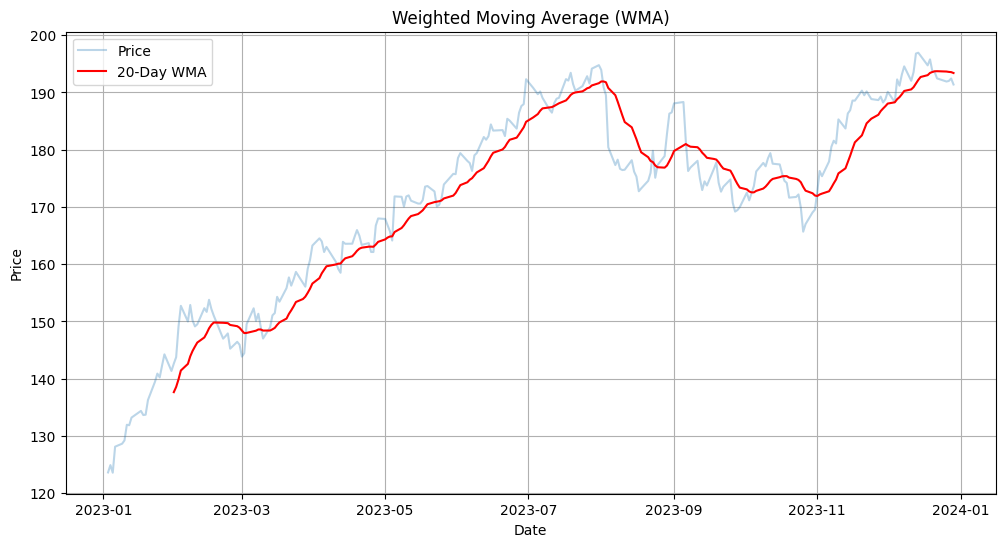

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Calculate Weighted Moving Average
def weighted_ma(series, window):
    weights = np.arange(1, window+1)  # Linear weights (1, 2, 3,...window)
    return series.rolling(window).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Calculate 20-day WMA
window = 20
stock_data['WMA_20'] = weighted_ma(stock_data['Close'], window)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['WMA_20'], label=f'{window}-Day WMA', color='red')
plt.title('Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

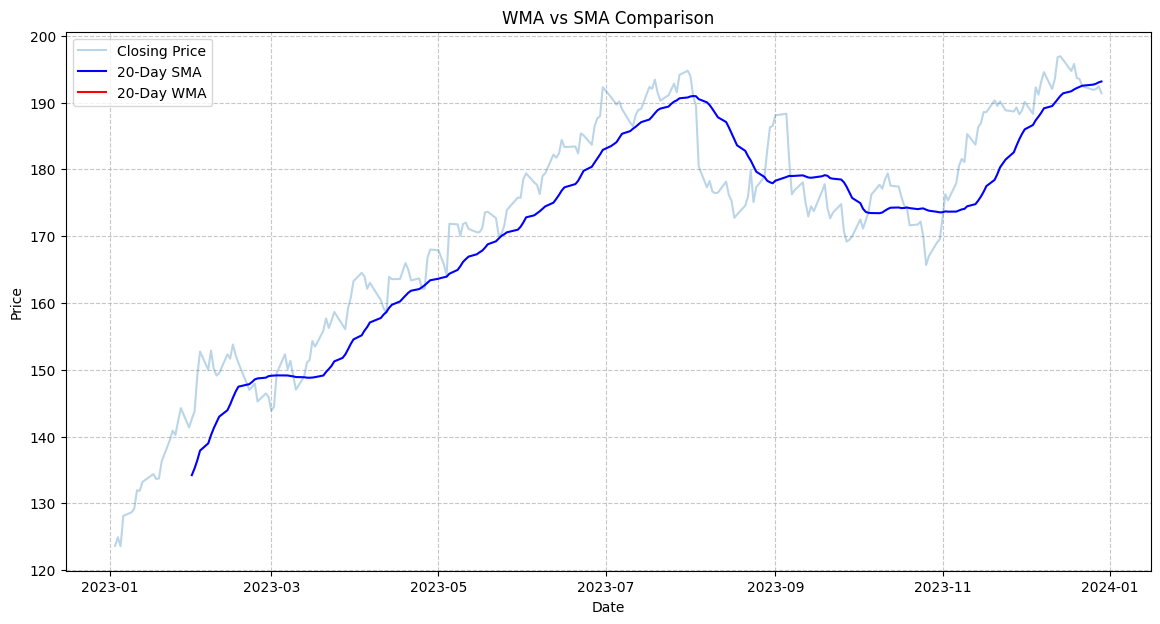

In [ ]:
# Calculate both WMA and SMA for comparison
window = 20
stock_data['WMA_20'] = weighted_ma(stock_data['Close'], window)
stock_data['SMA_20'] = stock_data['Close'].rolling(window).mean()

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Closing Price', alpha=0.3)
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(stock_data['WMA_20'], label='20-Day WMA', color='red')
plt.title('WMA vs SMA Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

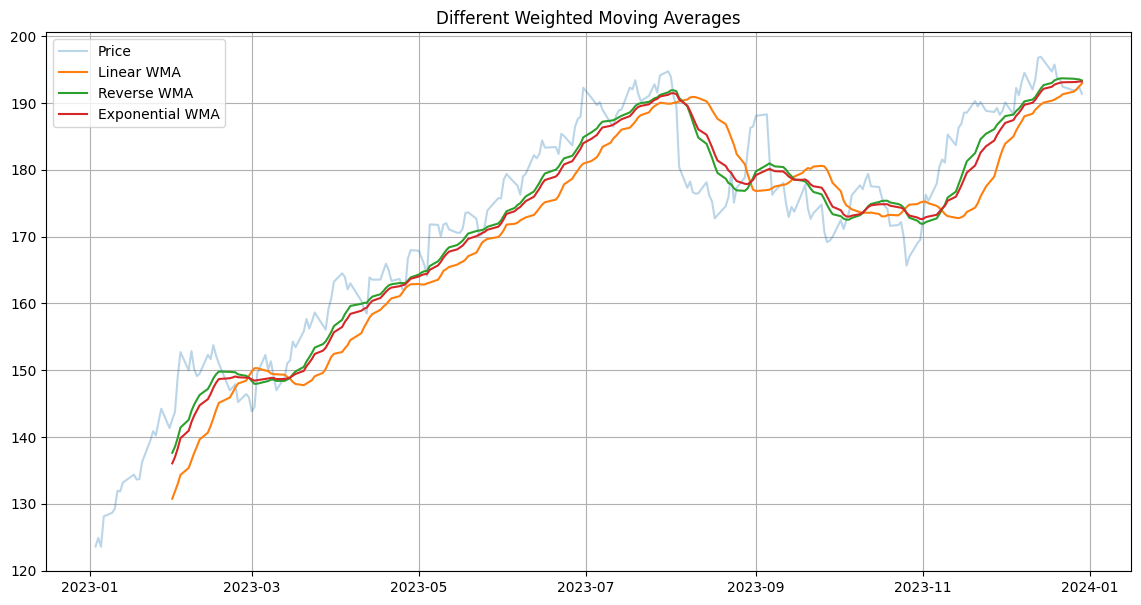

In [ ]:
def custom_weighted_ma(series, window, weight_type='linear'):
    """
    Types of weights:
    - 'linear': descending weights (3, 2, 1 for window=3)
    - 'reverse': ascending weights (1, 2, 3 for window=3)
    - 'exponential': custom exponential weights
    """
    if weight_type == 'linear':
        weights = np.arange(window, 0, -1)
    elif weight_type == 'reverse':
        weights = np.arange(1, window+1)
    elif weight_type == 'exponential':
        weights = np.exp(np.linspace(0, 1, window))

    return series.rolling(window).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Calculate different WMAs
stock_data['Linear_WMA_20'] = custom_weighted_ma(stock_data['Close'], 20, 'linear')
stock_data['Reverse_WMA_20'] = custom_weighted_ma(stock_data['Close'], 20, 'reverse')
stock_data['Exp_WMA_20'] = custom_weighted_ma(stock_data['Close'], 20, 'exponential')

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['Linear_WMA_20'], label='Linear WMA')
plt.plot(stock_data['Reverse_WMA_20'], label='Reverse WMA')
plt.plot(stock_data['Exp_WMA_20'], label='Exponential WMA')
plt.title('Different Weighted Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

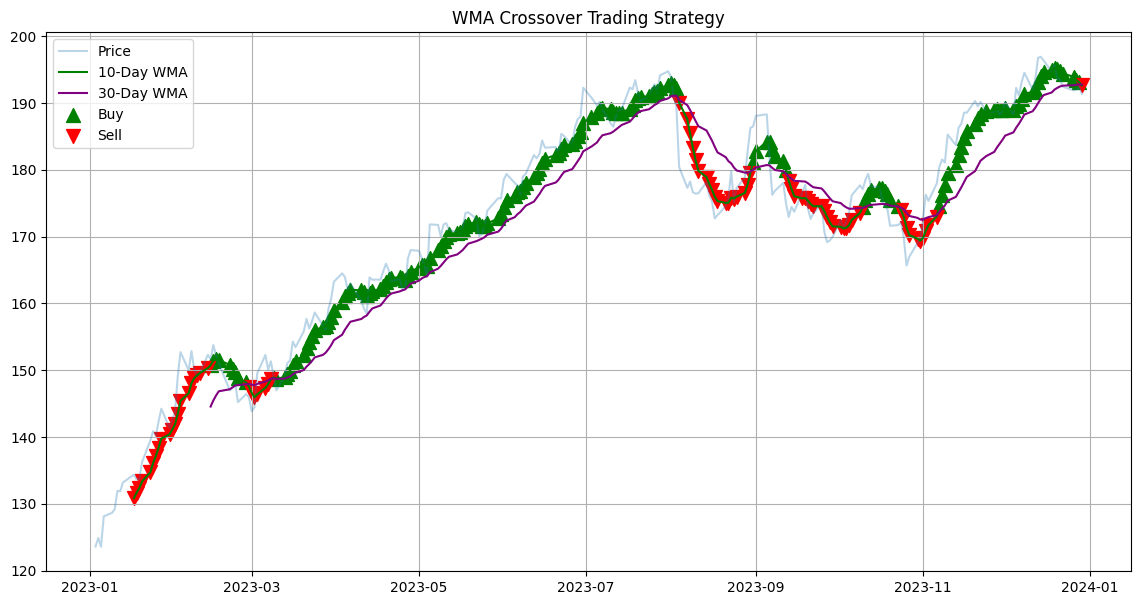

In [ ]:
# Calculate short and long WMAs
stock_data['WMA_10'] = weighted_ma(stock_data['Close'], 10)
stock_data['WMA_30'] = weighted_ma(stock_data['Close'], 30)

# Generate signals
stock_data['Signal'] = np.where(stock_data['WMA_10'] > stock_data['WMA_30'], 1, -1)

# Plot strategy
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['WMA_10'], label='10-Day WMA', color='green')
plt.plot(stock_data['WMA_30'], label='30-Day WMA', color='purple')

# Plot buy/sell signals
plt.scatter(stock_data.index[stock_data['Signal'] == 1],
           stock_data['WMA_10'][stock_data['Signal'] == 1],
           marker='^', color='g', s=100, label='Buy')
plt.scatter(stock_data.index[stock_data['Signal'] == -1],
           stock_data['WMA_10'][stock_data['Signal'] == -1],
           marker='v', color='r', s=100, label='Sell')

plt.title('WMA Crossover Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


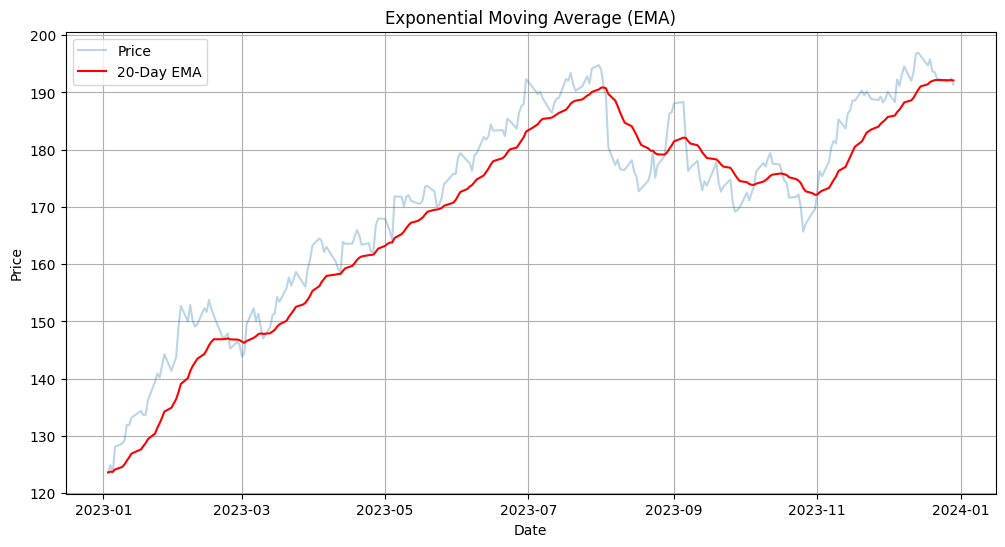

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Calculate 20-day EMA using pandas
window = 20
stock_data['EMA_20'] = stock_data['Close'].ewm(span=window, adjust=False).mean()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['EMA_20'], label=f'{window}-Day EMA', color='red')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

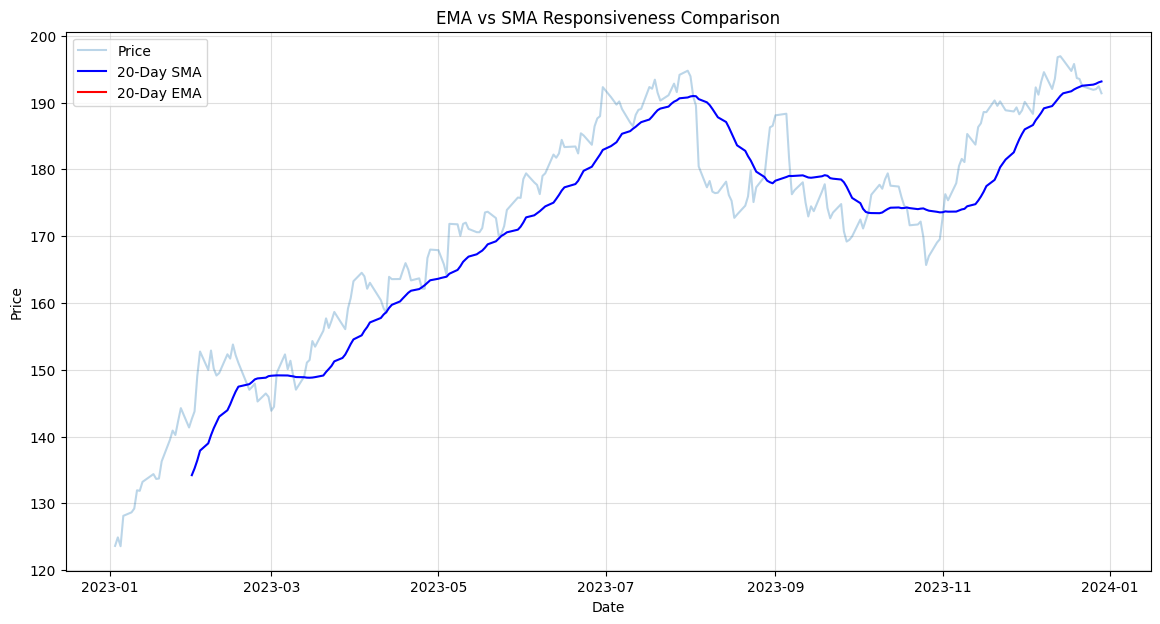

In [ ]:
# Calculate both EMA and SMA
window = 20
stock_data['EMA_20'] = stock_data['Close'].ewm(span=window, adjust=False).mean()
stock_data['SMA_20'] = stock_data['Close'].rolling(window).mean()

# Create plot
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price', alpha=0.3)
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(stock_data['EMA_20'], label='20-Day EMA', color='red')
plt.title('EMA vs SMA Responsiveness Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

[*********************100%***********************]  1 of 1 completed


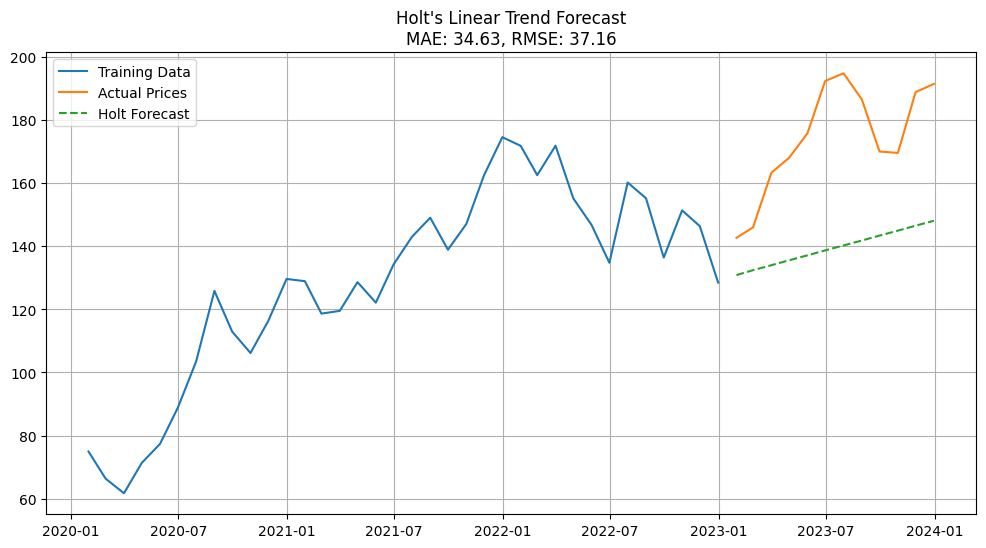

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load AAPL stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
ts = data['Close'].resample('M').last()  # Monthly closing prices

# Split into train/test
train = ts[:-12]  # First 3 years
test = ts[-12:]   # Last 12 months

# Fit Holt's model
model = ExponentialSmoothing(
    train,
    trend='add',    # Additive trend
    seasonal=None,   # No seasonality
    damped_trend=False
).fit()

# Forecast next 12 months
forecast = model.forecast(12)

# Calculate metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, label='Holt Forecast', linestyle='--')
plt.title(f"Holt's Linear Trend Forecast\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
air = get_rdataset('AirPassengers').data
air['date'] = pd.to_datetime(air['time'], format='%Y.%m')
ts_air = air.set_index('date')['value']

# Split data
train_air = ts_air[:-24]
test_air = ts_air[-24:]

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    train_air,
    trend='add',
    seasonal='mul',  # Multiplicative seasonality
    seasonal_periods=12
).fit()

# Forecast and evaluate
hw_forecast = hw_model.forecast(24)
hw_mae = mean_absolute_error(test_air, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(test_air, hw_forecast))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_air.index, train_air, label='Training')
plt.plot(test_air.index, test_air, label='Actual')
plt.plot(test_air.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title(f"Holt-Winters Seasonal Forecast\nMAE: {hw_mae:.2f}, RMSE: {hw_rmse:.2f}")
plt.legend()
plt.grid(True)
plt.show()

ValueError: time data "1949" doesn't match format "%Y.%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
air = get_rdataset('AirPassengers').data
# The 'time' column seems to only have the year.
# We'll extract the year using str.slice and convert it to datetime
air['date'] = pd.to_datetime(air['time'].str.slice(0, 4), format='%Y')
ts_air = air.set_index('date')['value']

# Split data
train_air = ts_air[:-24]
test_air = ts_air[-24:]

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    train_air,
    trend='add',
    seasonal='mul',  # Multiplicative seasonality
    seasonal_periods=12
).fit()

# Forecast and evaluate
hw_forecast = hw_model.forecast(24)
hw_mae = mean_absolute_error(test_air, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(test_air, hw_forecast))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_air.index, train_air, label='Training')
plt.plot(test_air.index, test_air, label='Actual')
plt.plot(test_air.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title(f"Holt-Winters Seasonal Forecast\nMAE: {hw_mae:.2f}, RMSE: {hw_rmse:.2f}")
plt.legend()
plt.grid(True)
plt.show()

AttributeError: Can only use .str accessor with string values!

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


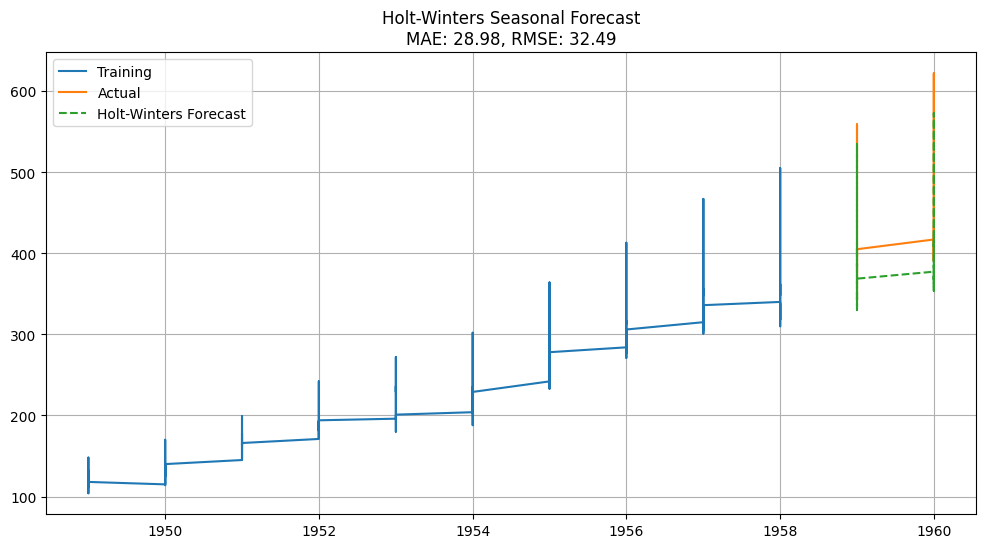

In [ ]:
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
air = get_rdataset('AirPassengers').data
# Convert 'time' column to string before using .str
air['date'] = pd.to_datetime(air['time'].astype(str).str.slice(0, 4), format='%Y')
ts_air = air.set_index('date')['value']

# Split data
train_air = ts_air[:-24]
test_air = ts_air[-24:]

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    train_air,
    trend='add',
    seasonal='mul',  # Multiplicative seasonality
    seasonal_periods=12
).fit()

# Forecast and evaluate
hw_forecast = hw_model.forecast(24)
hw_mae = mean_absolute_error(test_air, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(test_air, hw_forecast))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_air.index, train_air, label='Training')
plt.plot(test_air.index, test_air, label='Actual')
plt.plot(test_air.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title(f"Holt-Winters Seasonal Forecast\nMAE: {hw_mae:.2f}, RMSE: {hw_rmse:.2f}")
plt.legend()
plt.grid(True)
plt.show()